## `Supervised learning --> Linear Regression with sklearn`

## Step 1
1. Import Libraries
2. Get the data
3. Discover and visualize the data
4. Prepare the data for Machine Learning algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
# (%) Is a Magic Command -> To display plot in this Window

#### We will create a dataset out of a sine curve with some noise:

In [2]:
x = np.linspace(-3, 3, 100)
print(x[:10])

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545]


In [3]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

### ``Tip:`` Try to plot your data if you can because gives you a good view of the data

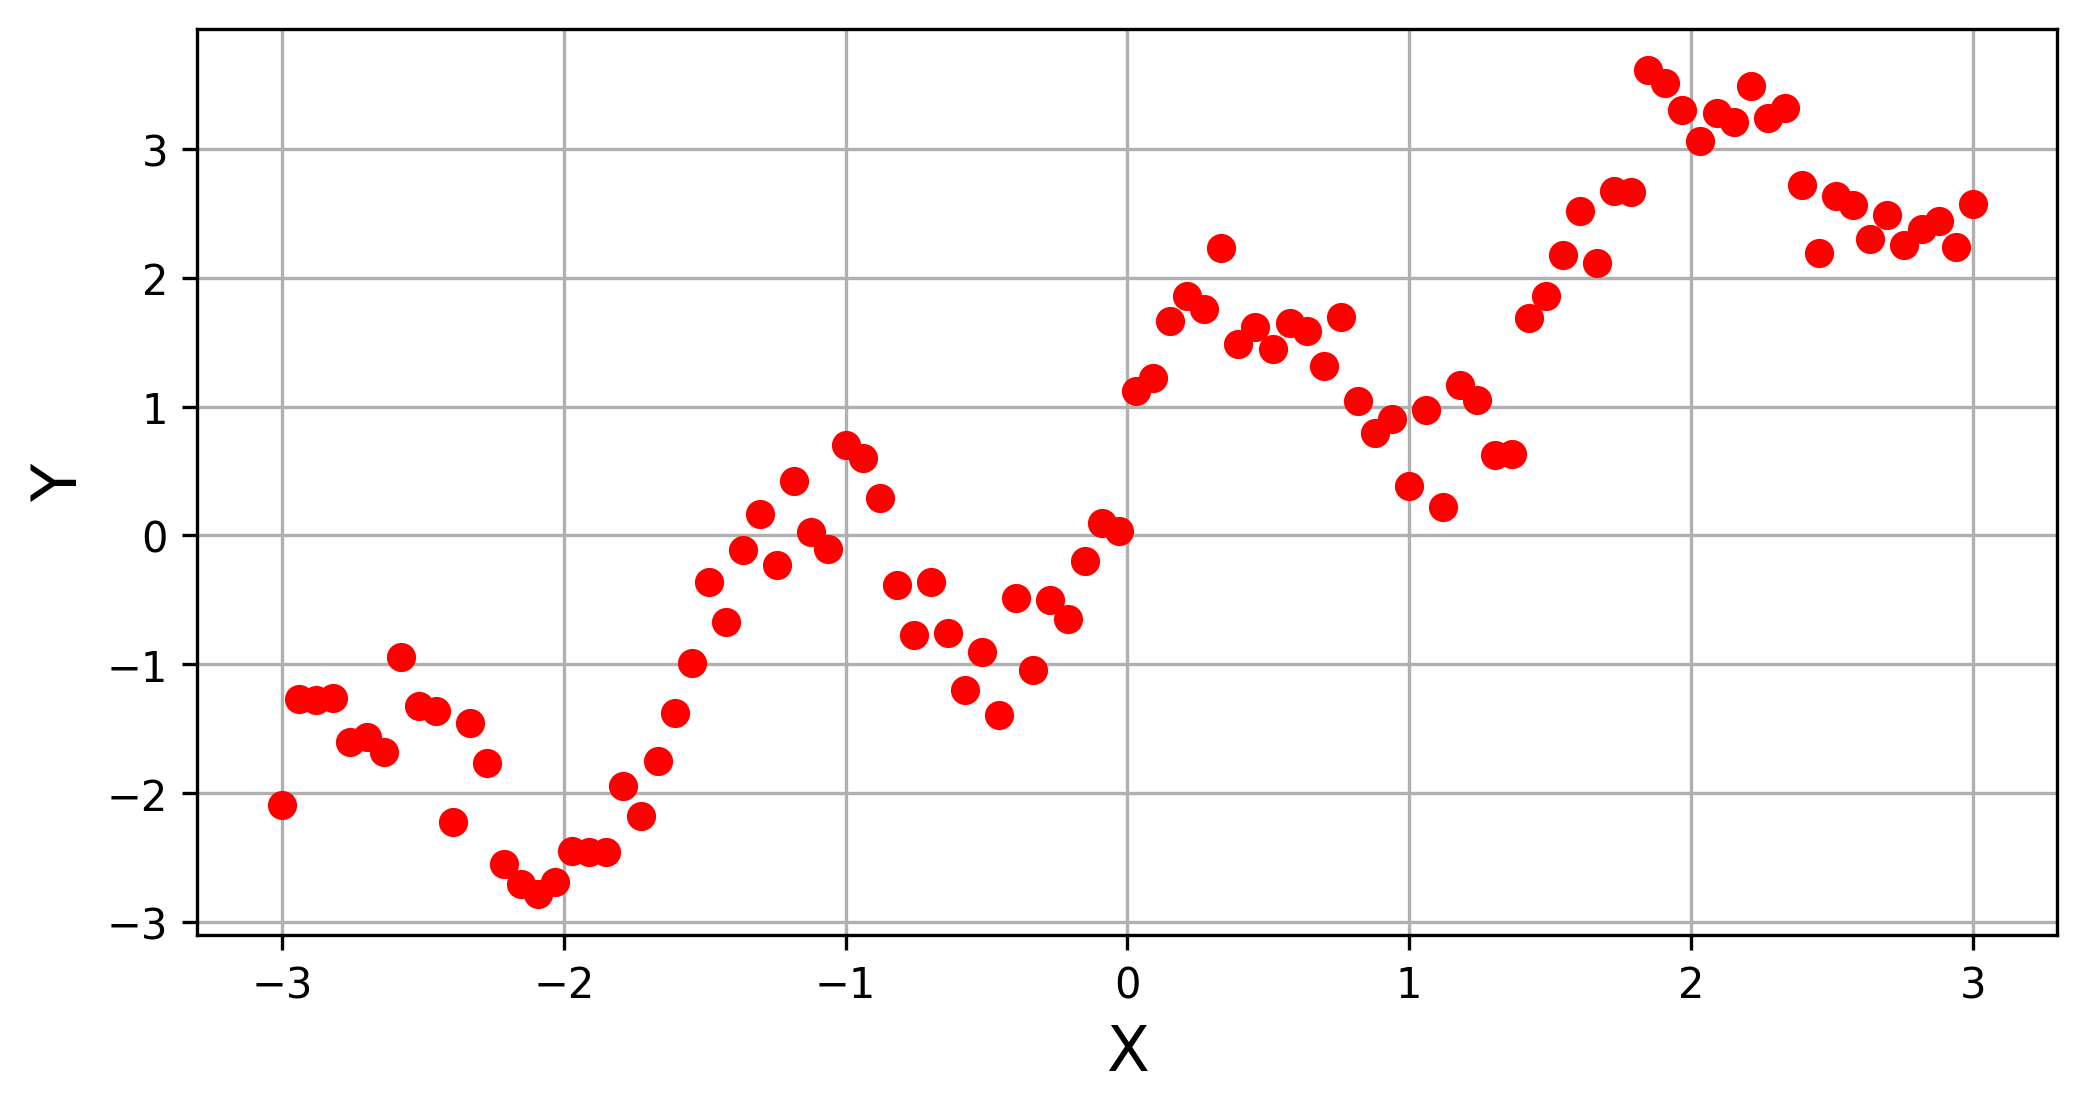

In [4]:
plt.figure(figsize=(8, 4), dpi = 300)
plt.plot(x, y, 'ro')
plt.xlabel('X', size = 15)
plt.ylabel('Y', size = 15)
plt.grid()

#### Again, we start by splitting our dataset into a training (75%) and a test set (25%):

In [5]:
print('\nBefore: ', x.shape)
x = np.reshape(x, (-1, 1))
print('After: ', x.shape) 


Before:  (100,)
After:  (100, 1)


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

/home/amin/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Step 2
we use the learning algorithm implemented in `LinearRegression` to **fit a regression model to the training data**:

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [8]:
print('Weight coefficients (Weight) : ', regressor.coef_)
print('y-axis intercept (Bias) : ', regressor.intercept_)

Weight coefficients (Weight) :  [0.92596425]
y-axis intercept (Bias) :  0.427298905227778


Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as 

$$y = weight \times x + \text{intercept(bias)}.$$

Plugging in the min and max values into thos equation, we can plot the regression fit to our training data:

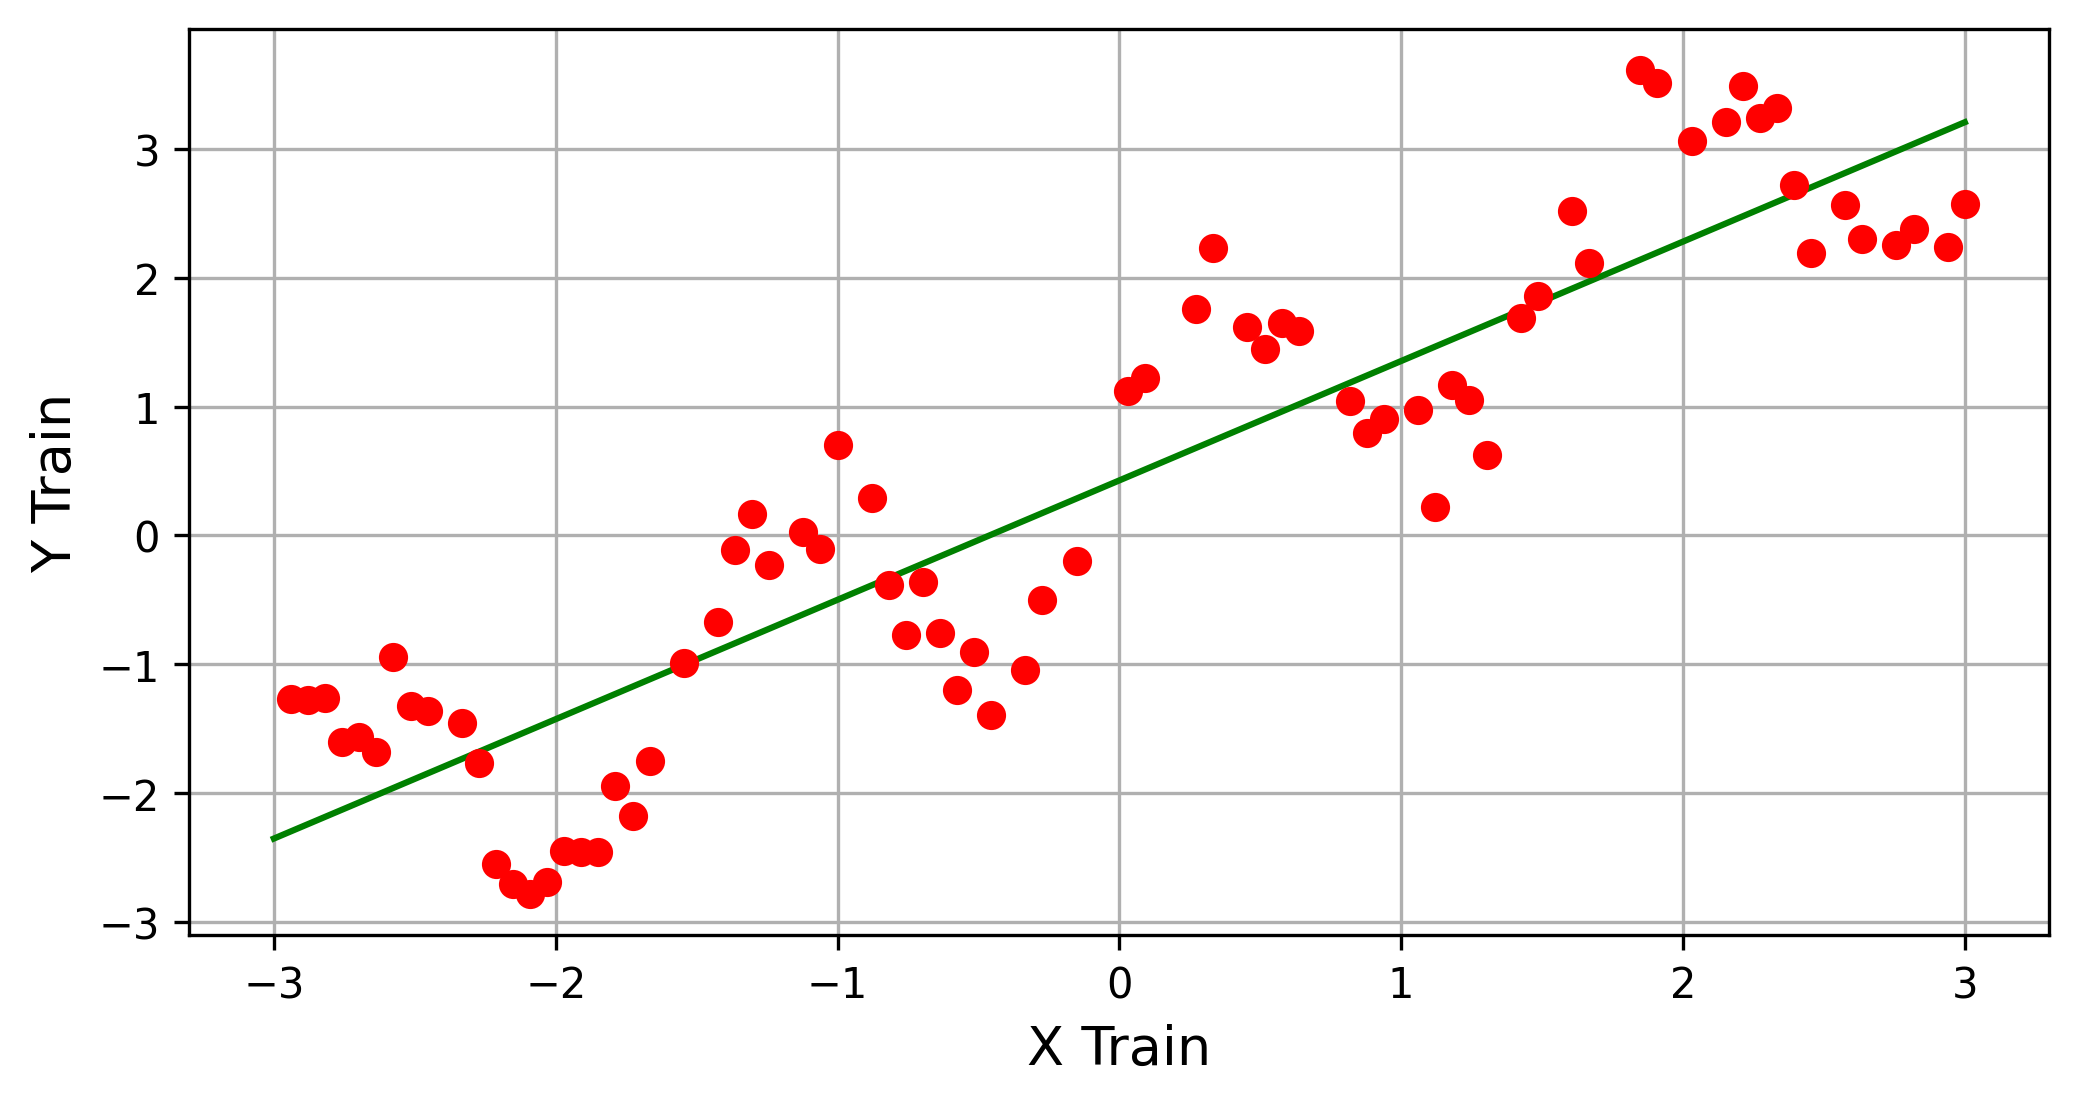

In [9]:
min_y = x.min() * regressor.coef_[0] + regressor.intercept_
max_y = x.max() * regressor.coef_[0] + regressor.intercept_

plt.figure(figsize=(8, 4), dpi = 300)
plt.plot([x.min(), x.max()], [min_y, max_y], 'g')
plt.plot(x_train, y_train, 'ro');
plt.xlabel('X Train', size = 13)
plt.ylabel('Y Train', size = 13)
plt.grid()

## Step 3
### Prediction
we use the `predict` method to predict the target variable.

In [10]:
y_pred = regressor.predict(x_test)

scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. For regression tasks, this is the R<sup>2</sup> score. Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

In [11]:
score = regressor.score(x_test, y_test) * 100
print("Prediction Quantitatively (Score): %%%.4f" % score)

Prediction Quantitatively (Score): %78.3470


#### MSE loss:
A non-negative floating point value (the best value is 0.0), or an array of floating point values,
one for each individual target.

In [12]:
from sklearn.metrics import mean_squared_error
loss = mean_squared_error(x_test, y_test)
print("Loss is : %.4f" % loss)

Loss is : 0.8483


## Final Plot

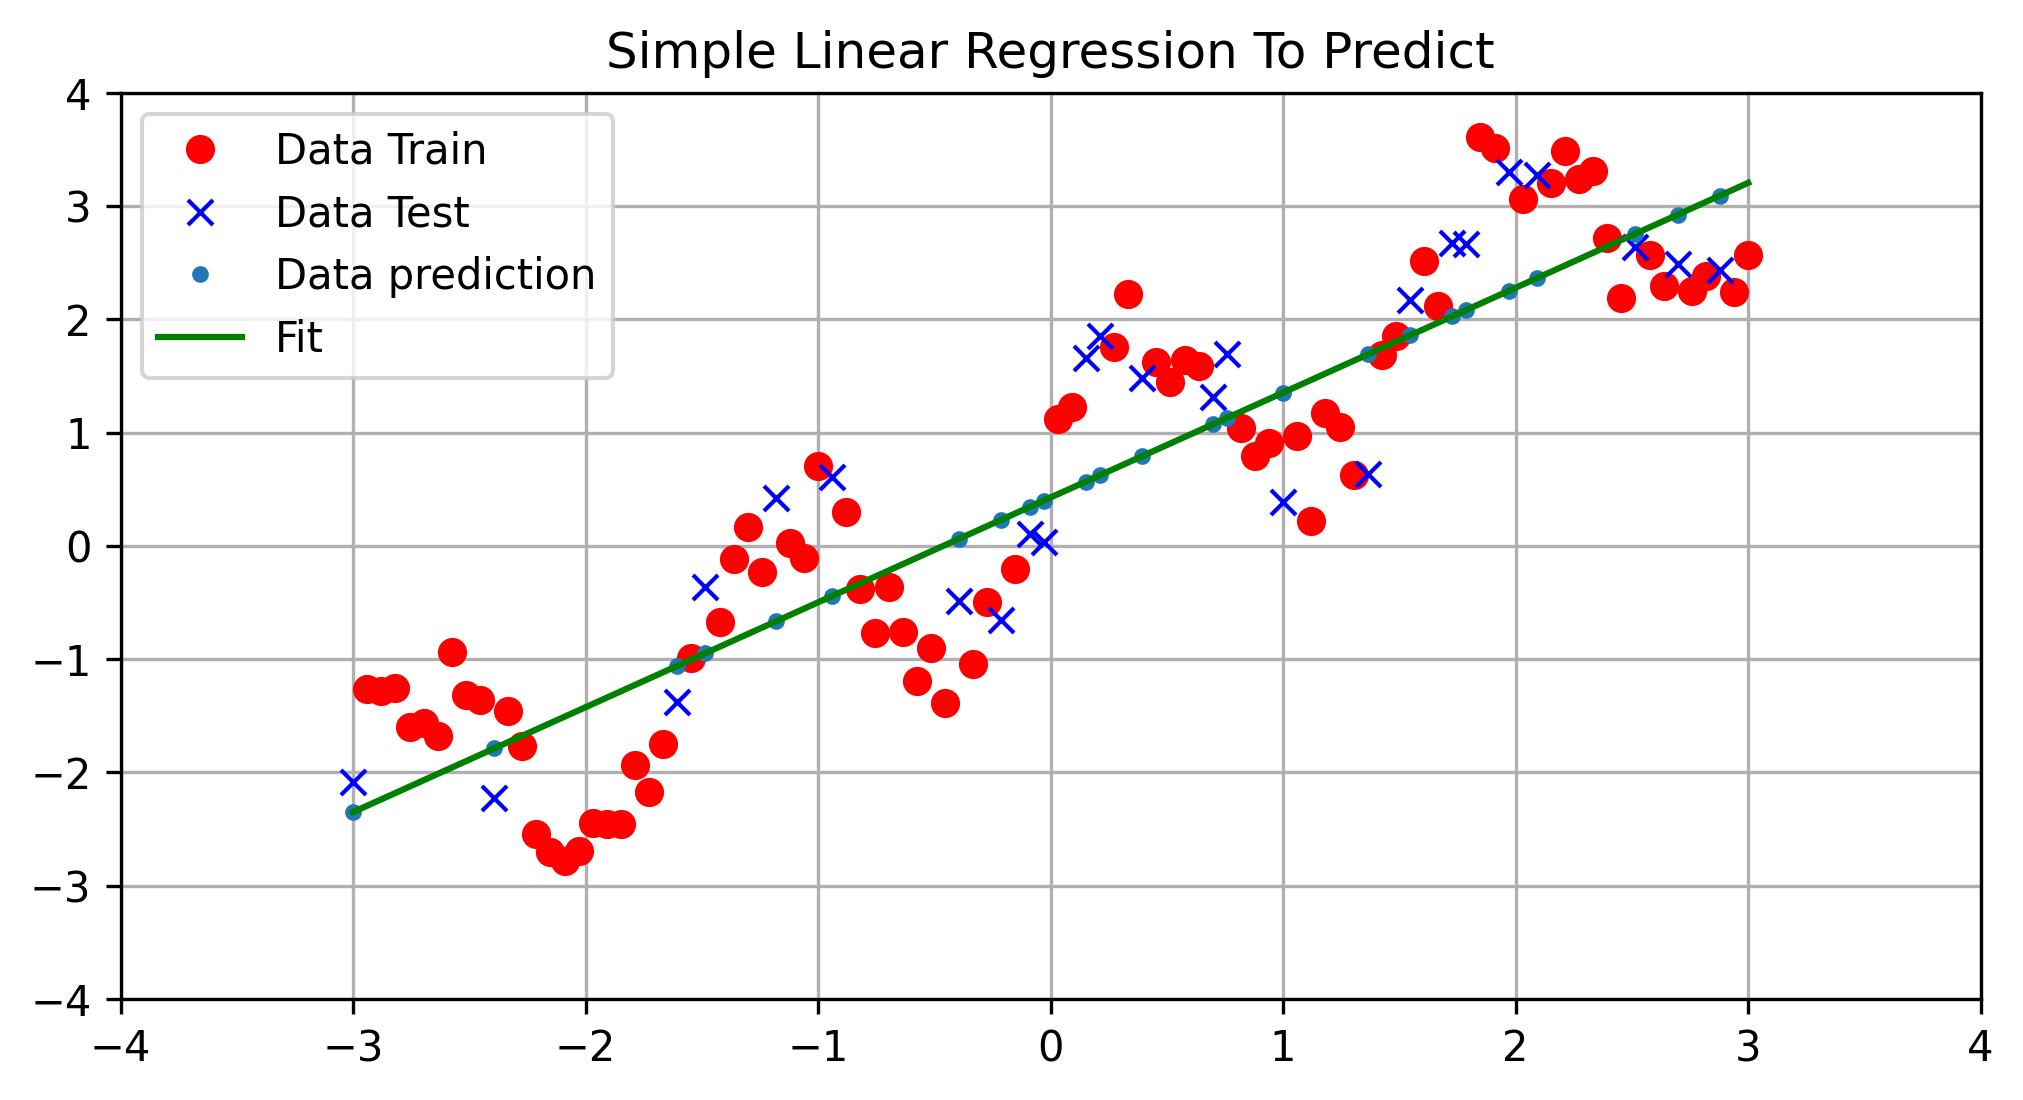

In [13]:
plt.figure(figsize=(8, 4), dpi = 300)
# plt.plot(x, y, 'bo', label = 'Genrral Data')
plt.plot(x_train, y_train, 'ro', label = 'Data Train')
plt.plot(x_test, y_test, 'bx', label = 'Data Test')
plt.plot(x_test, y_pred, '.', label = 'Data prediction')
plt.plot([x.min(), x.max()], [min_y, max_y], 'g', label = 'Fit')
plt.legend(loc='best')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.title('Simple Linear Regression To Predict')
plt.grid()